<a href="https://colab.research.google.com/github/December04/MachineLearningProgramming/blob/main/Week10/Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

In [4]:
X_train = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt")
y_train = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt")
X_test = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt")
y_test = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt")

In [5]:
y_train = to_categorical(y_train - 1)
y_test = to_categorical(y_test - 1)

In [6]:
print("훈련 데이터:", X_train.shape)
print("테스트 데이터:", X_test.shape)

훈련 데이터: (7352, 561)
테스트 데이터: (2947, 561)


In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

cnn = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(561, 1)),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn_history = cnn.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 559, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 279, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 277, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 138, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 17664)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,261,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,286,854 (8.72 MB)

 Trainable params: 2,286,854 (8.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - accuracy: 0.5143 - loss: 1.1501 - val_accuracy: 0.9211 - val_loss: 0.2325
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.8915 - loss: 0.2807 - val_accuracy: 0.9300 - val_loss: 0.1654
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 175ms/step - accuracy: 0.9425 - loss: 0.1541 - val_accuracy: 0.9279 - val_loss: 0.1505
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.9512 - loss: 0.1283 - val_accuracy: 0.9300 - val_loss: 0.1565
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - accuracy: 0.9660 - loss: 0.0985 - val_accuracy: 0.9395 - val_loss: 0.1681
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - accuracy: 0.9681 - loss: 0.0884 - val_accuracy: 0.9368 - val_loss: 0.1828
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - accuracy: 0.9754 - loss: 0.0689 - val_accuracy: 0.9361 - val_loss: 0.1451
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - accuracy: 0.9773 - loss: 0.0640 - val_accu

In [9]:
from tensorflow.keras.layers import LSTM

lstm = Sequential([
    LSTM(64, input_shape=(561, 1), return_sequences=False),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm.summary()

lstm_history = lstm.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,990 (101.52 KB)

 Trainable params: 25,990 (101.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.2709 - loss: 1.6762 - val_accuracy: 0.3338 - val_loss: 1.2431
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 332ms/step - accuracy: 0.3969 - loss: 1.3477 - val_accuracy: 0.4969 - val_loss: 1.0823
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 333ms/step - accuracy: 0.4725 - loss: 1.0673 - val_accuracy: 0.5731 - val_loss: 1.0052
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 381ms/step - accuracy: 0.5150 - loss: 0.9856 - val_accuracy: 0.6111 - val_loss: 0.9021
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 397ms/step - accuracy: 0.5796 - loss: 0.8773 - val_accuracy: 0.6655 - val_loss: 0.8868
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 405ms/step - accuracy: 0.6080 - loss: 0.8042 - val_accuracy: 0.6499 - val_loss: 0.8851
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 37s 401ms/step - accuracy: 0.6219 - loss: 0.8092 - val_accuracy: 0.5860 - val_loss: 1.0036
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 418ms/step - accuracy: 0.6413 - loss: 0.7670 - val_accu

In [11]:
cnn_acc = cnn.evaluate(X_test, y_test, verbose=0)[1]
lstm_acc = lstm.evaluate(X_test, y_test, verbose=0)[1]

In [12]:
print(f"CNN 정확도:  {cnn_acc*100:.2f}%")
print(f"LSTM 정확도: {lstm_acc*100:.2f}%")

CNN 정확도:  93.93%
LSTM 정확도: 76.82%


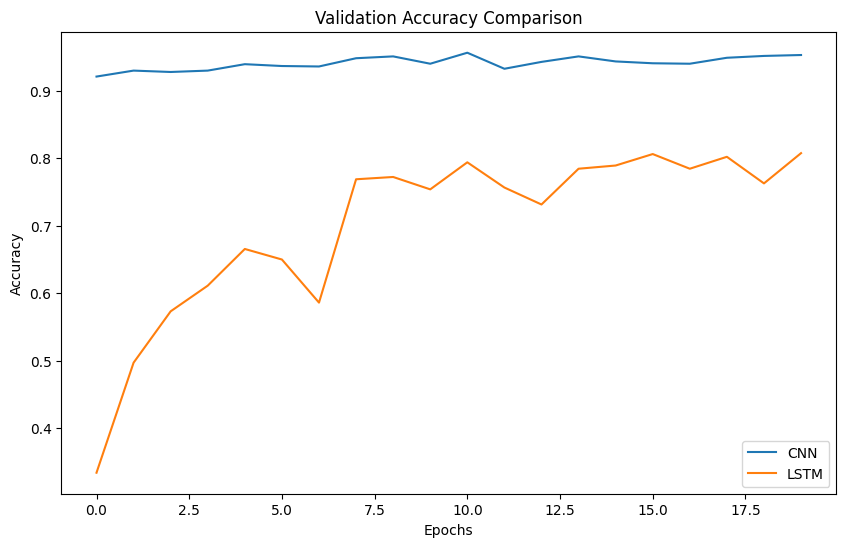

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(cnn_history.history['val_accuracy'], label='CNN')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM')

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()